In [18]:
# load dataset
from tensorflow.keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [19]:
# Analyze the Data
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [20]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In the following piece of code we observe that we are going to visualize the data set as an image.

Text(0.5, 1.0, 'Ground Truth : 9')

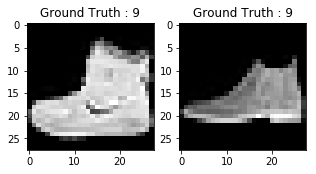

In [21]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

Now we are going to reshape the dataset to fit with the CNN input. We use a single channel because we are dealing with grey scale images.

In [22]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [23]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [24]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [25]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [37]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [38]:
batch_size = 64
epochs = 20
num_classes = 10

In [39]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))


In [40]:
fashion_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 128)        

In [41]:
fashion_model.compile(loss=categorical_crossentropy,
                      optimizer=Adam(),
                      metrics=['accuracy'])

In [42]:
fashion_train = fashion_model.fit(train_X, train_label, 
                                  batch_size=batch_size,
                                  epochs=epochs,
                                  verbose=1,
                                  validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 48s 64ms/step - loss: 0.4598 - accuracy: 0.8322 - val_loss: 0.3306 - val_accuracy: 0.8815
Epoch 2/20
750/750 [==============================] - 48s 64ms/step - loss: 0.2865 - accuracy: 0.8953 - val_loss: 0.2815 - val_accuracy: 0.8997
Epoch 3/20
750/750 [==============================] - 45s 60ms/step - loss: 0.2415 - accuracy: 0.9127 - val_loss: 0.2470 - val_accuracy: 0.9087
Epoch 4/20
750/750 [==============================] - 53s 70ms/step - loss: 0.2086 - accuracy: 0.9224 - val_loss: 0.2462 - val_accuracy: 0.9103
Epoch 5/20
750/750 [==============================] - 59s 79ms/step - loss: 0.1822 - accuracy: 0.9323 - val_loss: 0.2324 - val_accuracy: 0.9168
Epoch 6/20
750/750 [==============================] - 56s 75ms/step - loss: 0.1607 - accuracy: 0.9401 - val_loss: 0.2396 - val_accuracy: 0.9172
Epoch 7/20
750/750 [==============================] - 55s 73ms/step - loss: 0.1380 - accuracy: 0.9479 - val_loss: 0.2334 - val_accuracy:

In [43]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

We can obsesrve that the training accuracy is increasing over time but the validation accuracy stagnates at epoch 5 more and less and it does not improve at all. 

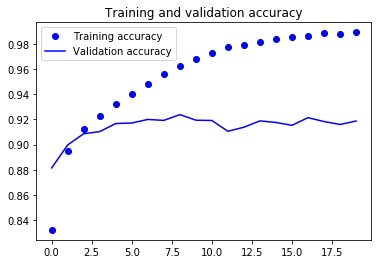

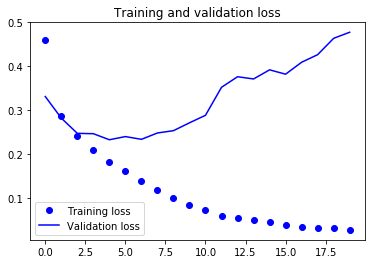

In [45]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [46]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [47]:
fashion_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)         

In [53]:
batch_size = 64
epochs = 20
num_classes = 10

In [54]:
fashion_model.compile(loss=categorical_crossentropy,
                      optimizer=Adam(),
                      metrics=['accuracy'])

In [55]:
fashion_train = fashion_model.fit(train_X, train_label, 
                                  batch_size=batch_size,
                                  epochs=epochs,
                                  verbose=1,
                                  validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 51s 68ms/step - loss: 0.5989 - accuracy: 0.7773 - val_loss: 0.3681 - val_accuracy: 0.8692
Epoch 2/20
750/750 [==============================] - 52s 70ms/step - loss: 0.3774 - accuracy: 0.8618 - val_loss: 0.3058 - val_accuracy: 0.8900
Epoch 3/20
750/750 [==============================] - 76s 102ms/step - loss: 0.3293 - accuracy: 0.8785 - val_loss: 0.2978 - val_accuracy: 0.8900
Epoch 4/20
750/750 [==============================] - 69s 91ms/step - loss: 0.3049 - accuracy: 0.8879 - val_loss: 0.2618 - val_accuracy: 0.9018
Epoch 5/20
750/750 [==============================] - 55s 74ms/step - loss: 0.2830 - accuracy: 0.8945 - val_loss: 0.2584 - val_accuracy: 0.9053
Epoch 6/20
750/750 [==============================] - 60s 80ms/step - loss: 0.2678 - accuracy: 0.9008 - val_loss: 0.2401 - val_accuracy: 0.9118
Epoch 7/20
750/750 [==============================] - 67s 89ms/step - loss: 0.2578 - accuracy: 0.9047 - val_loss: 0.2459 - val_accuracy

In [56]:
fashion_model.save("fashion_model_dropout.h5py")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [57]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.2228 - accuracy: 0.9213
Test loss: 0.22279192507266998
Test accuracy: 0.9212999939918518


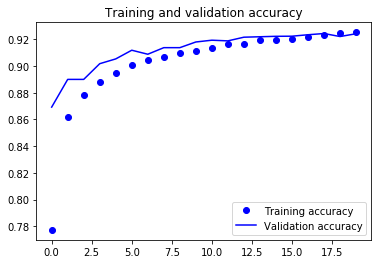

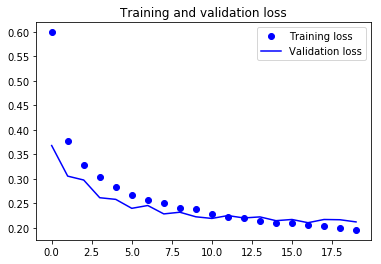

In [58]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [59]:
predicted_classes = fashion_model.predict(test_X)

In [60]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

Found 9175 correct labels


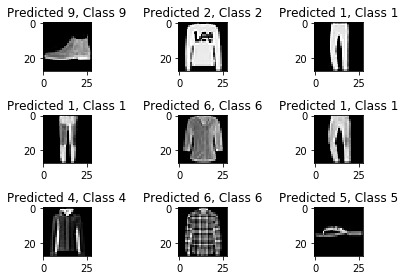

In [62]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

In [63]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.77      0.91      0.83      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.93      0.84      0.88      1000
     Class 3       0.93      0.92      0.92      1000
     Class 4       0.83      0.93      0.88      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.83      0.69      0.75      1000
     Class 7       0.97      0.96      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

